# Visualizing Distributions with Python

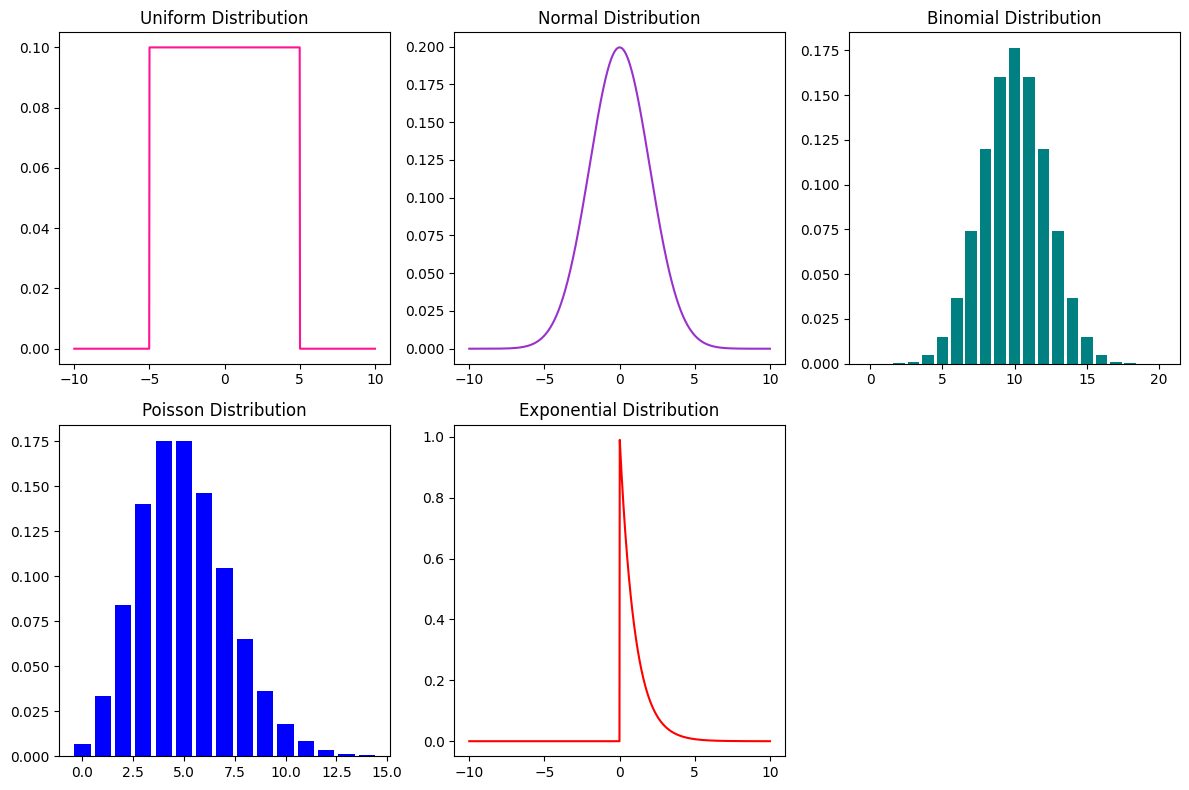

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, poisson, expon

# Data setup
x = np.linspace(-10, 10, 1000)

# 1. Uniform Distribution
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.title("Uniform Distribution")
data_uniform = uniform.pdf(x, loc=-5, scale=10)  # Uniform from -5 to 5
plt.plot(x, data_uniform,color='deeppink')

# 2. Normal Distribution
plt.subplot(2, 3, 2)
plt.title("Normal Distribution")
data_normal = norm.pdf(x, loc=0, scale=2)  # Mean = 0, SD = 2
plt.plot(x, data_normal,color='darkorchid')

# 3. Binomial Distribution
plt.subplot(2, 3, 3)
plt.title("Binomial Distribution")
n, p = 20, 0.5  # 20 trials, 50% success probability
data_binom = binom.pmf(range(21), n, p)
plt.bar(range(21), data_binom,color='teal')

# 4. Poisson Distribution
plt.subplot(2, 3, 4)
plt.title("Poisson Distribution")
mu = 5
data_poisson = poisson.pmf(range(15), mu)
plt.bar(range(15), data_poisson,color='blue')

# 5. Exponential Distribution
plt.subplot(2, 3, 5)
plt.title("Exponential Distribution")
data_expon = expon.pdf(x, scale=1)  # Lambda = 1
plt.plot(x, data_expon,color='red')

plt.tight_layout()
plt.show()


## Uniform Distribution

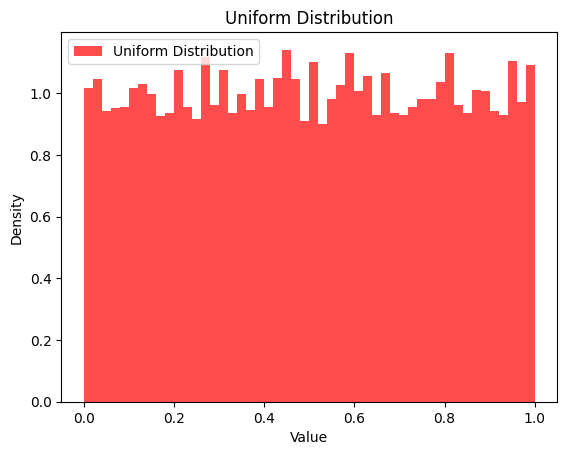

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a uniform distribution
data_uniform = np.random.uniform(low=0, high=1, size=10000)

# Visualize
plt.hist(data_uniform, bins=50, density=True, alpha=0.7, color='red', label='Uniform Distribution')
plt.title("Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


## Normal Distribution (Gaussian)

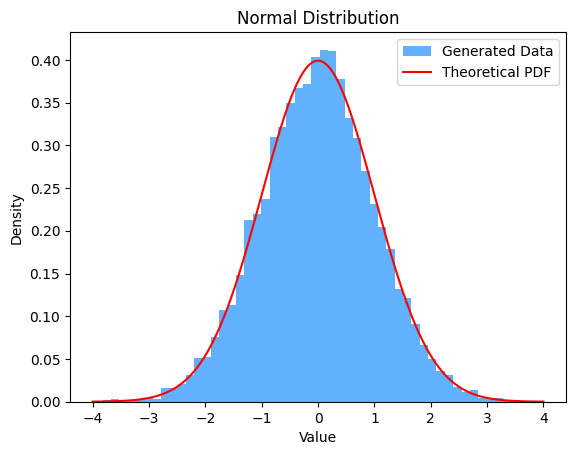

In [11]:
from scipy.stats import norm

# Generate data
data_normal = np.random.normal(loc=0, scale=1, size=10000)

# Visualize
x = np.linspace(-4, 4, 1000)
plt.hist(data_normal, bins=50, density=True, color='dodgerblue', alpha=0.7, label="Generated Data")
plt.plot(x, norm.pdf(x, loc=0, scale=1), 'r-', label="Theoretical PDF")
plt.title("Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


## Binomial Distribution

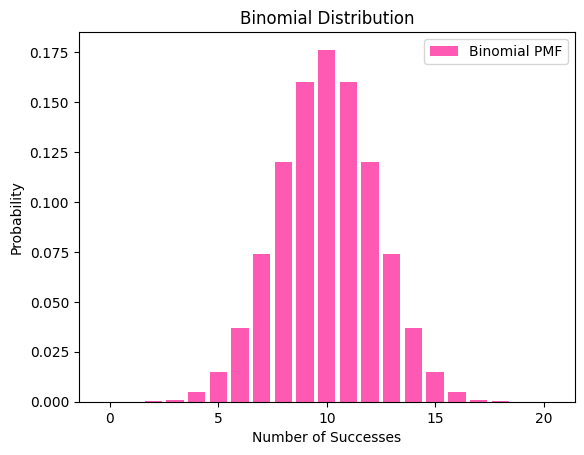

In [30]:
from scipy.stats import binom

# Parameters
n, p = 20, 0.5

# Generate data
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Visualize
plt.bar(x, pmf, alpha=0.7,color='deeppink', label="Binomial PMF")
plt.title("Binomial Distribution")
plt.xlabel("Number of Successes")
plt.ylabel("Probability")
plt.legend()
plt.show()


## Poisson Distribution

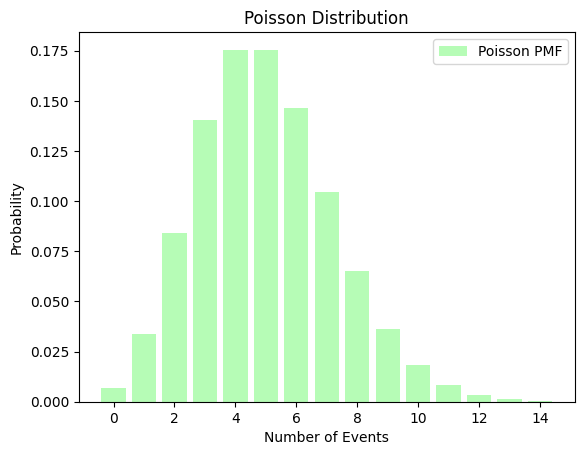

In [31]:
from scipy.stats import poisson

# Parameters
mu = 5

# Generate data
x = np.arange(0, 15)
pmf = poisson.pmf(x, mu)

# Visualize
plt.bar(x, pmf, alpha=0.7,color='palegreen', label="Poisson PMF")
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.legend()
plt.show()


## Exponential Distribution

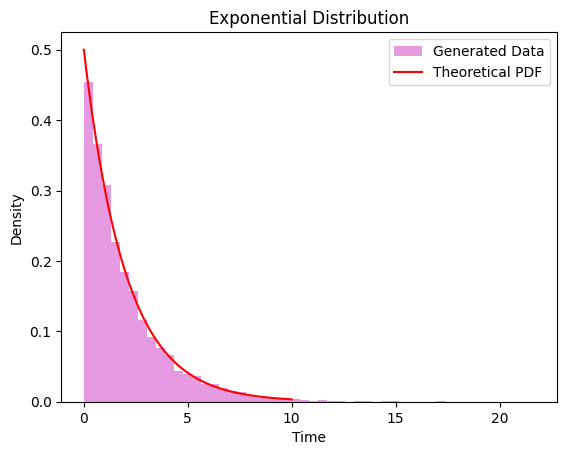

In [32]:
from scipy.stats import expon

# Parameters
scale = 2  # Mean time between events

# Generate data
data_expon = np.random.exponential(scale=scale, size=10000)

# Visualize
x = np.linspace(0, 10, 1000)
plt.hist(data_expon, bins=50, density=True,color='orchid', alpha=0.7, label="Generated Data")
plt.plot(x, expon.pdf(x, scale=scale), 'r-', label="Theoretical PDF")
plt.title("Exponential Distribution")
plt.xlabel("Time")
plt.ylabel("Density")
plt.legend()
plt.show()


## Uniform to Normal

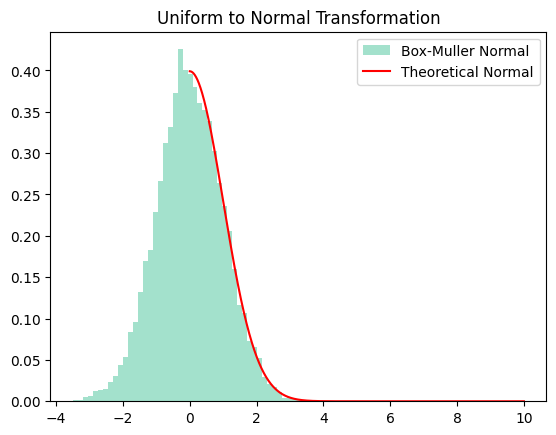

In [34]:
# Uniform to Normal
u1 = np.random.uniform(size=10000)
u2 = np.random.uniform(size=10000)

# Box-Muller Transform
z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

# Visualize
plt.hist(z1, bins=50, density=True, alpha=0.6,color='mediumaquamarine', label="Box-Muller Normal")
plt.plot(x, norm.pdf(x, loc=0, scale=1), label="Theoretical Normal", color="red")
plt.legend()
plt.title("Uniform to Normal Transformation")
plt.show()


## Normal to Exponential

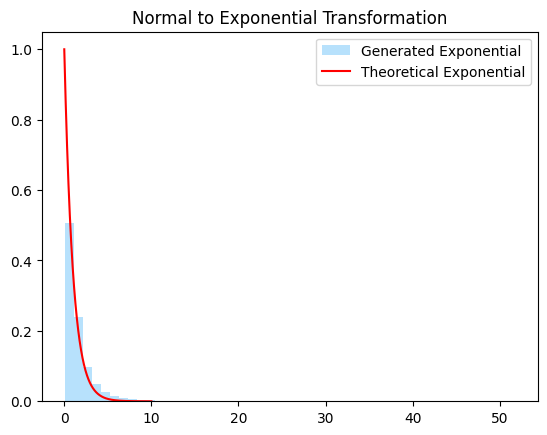

In [35]:
# Normal to Exponential
z = np.random.normal(size=10000)
exponential_data = np.exp(z)

# Visualize
plt.hist(exponential_data, bins=50, density=True,color='lightskyblue', alpha=0.6, label="Generated Exponential")
plt.plot(x, expon.pdf(x, scale=1), label="Theoretical Exponential", color="red")
plt.legend()
plt.title("Normal to Exponential Transformation")
plt.show()


## Gaussian noise

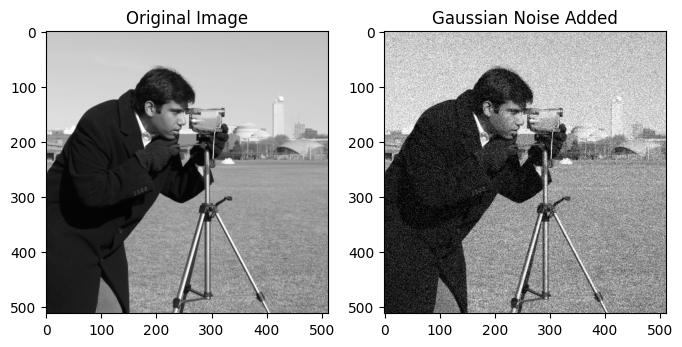

In [25]:
from skimage.util import random_noise
from skimage import data, io

image = data.camera()
noisy_image = random_noise(image, mode='gaussian', var=0.01)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Gaussian Noise Added")
plt.imshow(noisy_image, cmap='gray')
plt.show()


## Multivariate Distributions

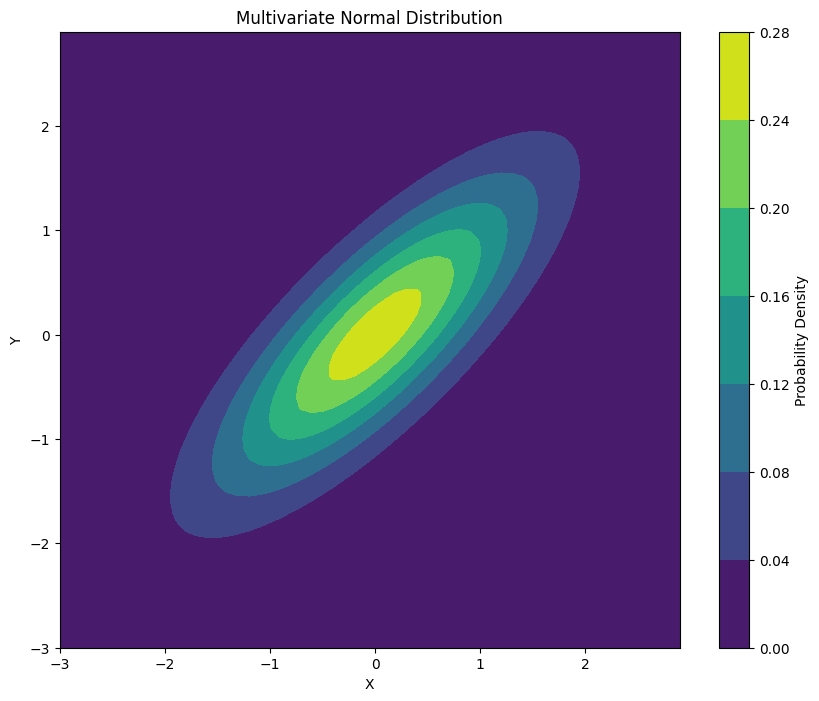

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters
mean = [0, 0]  # Mean of X and Y
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix (positive correlation)

# Generate a grid
x, y = np.mgrid[-3:3:.1, -3:3:.1]
pos = np.dstack((x, y))

# Multivariate normal distribution
rv = multivariate_normal(mean, cov)
pdf = rv.pdf(pos)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(x, y, pdf, cmap="viridis")
plt.colorbar(label="Probability Density")
plt.title("Multivariate Normal Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Bayesian Inference

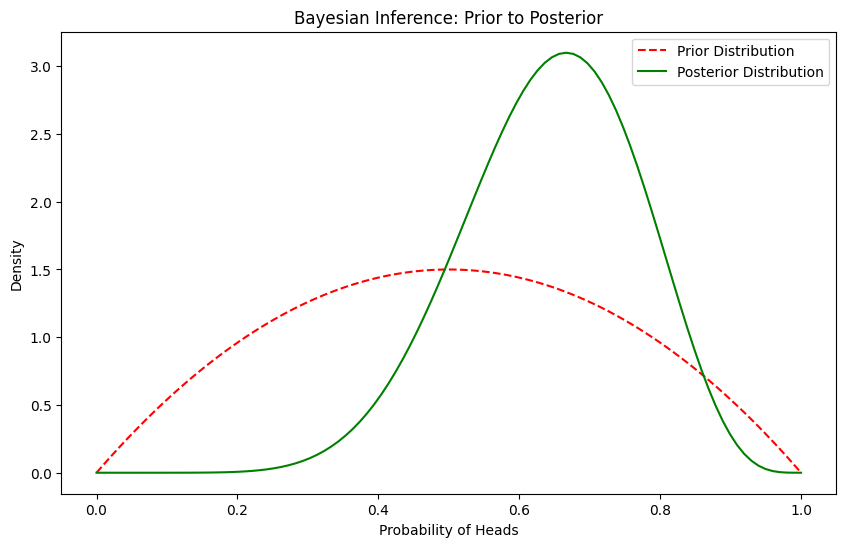

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters for Beta distribution (prior belief)
alpha_prior, beta_prior = 2, 2

# Observed data: 7 heads in 10 flips
observed_heads = 7
observed_tails = 3

# Posterior parameters
alpha_post = alpha_prior + observed_heads
beta_post = beta_prior + observed_tails

# Plot prior and posterior
x = np.linspace(0, 1, 100)
prior = beta.pdf(x, alpha_prior, beta_prior)
posterior = beta.pdf(x, alpha_post, beta_post)

plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior Distribution", color='red', linestyle="--")
plt.plot(x, posterior,color='green', label="Posterior Distribution")
plt.title("Bayesian Inference: Prior to Posterior")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()
plt.show()


## Multivariate Bayesian Inference

In [21]:
# Prior parameters
prior_mean = np.array([0, 0])
prior_cov = np.array([[1, 0.5], [0.5, 1]])

# Observed data
data = np.random.multivariate_normal([1, 1], [[1, 0], [0, 1]], size=10)

# Posterior mean (weighted average of prior mean and sample mean)
sample_mean = np.mean(data, axis=0)
n = data.shape[0]
posterior_mean = (prior_cov @ sample_mean + prior_mean) / (1 + n)

# Posterior covariance (reduced uncertainty)
posterior_cov = prior_cov / (1 + n)

print("Posterior Mean:", posterior_mean)
print("Posterior Covariance Matrix:", posterior_cov)


Posterior Mean: [0.20975162 0.16816433]
Posterior Covariance Matrix: [[0.09090909 0.04545455]
 [0.04545455 0.09090909]]


## Copulas for Dependency Modeling

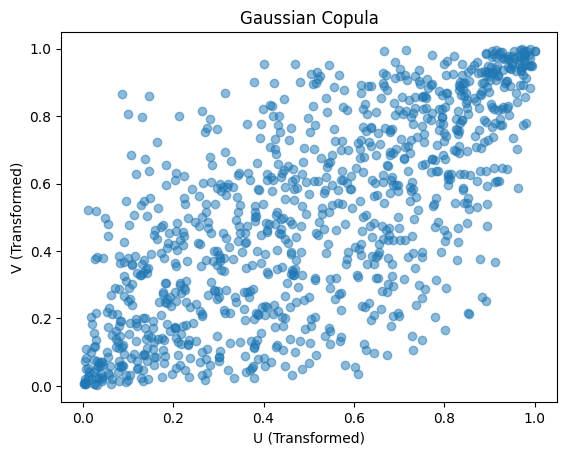

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, kendalltau

# Generate correlated data using a Gaussian copula
rho = 0.7  # Correlation coefficient
mean = [0, 0]
cov = [[1, rho], [rho, 1]]
data = np.random.multivariate_normal(mean, cov, 1000)

# Transform to uniform margins using CDF
u = norm.cdf(data[:, 0])
v = norm.cdf(data[:, 1])

# Scatter plot of copula
plt.scatter(u, v, alpha=0.5)
plt.title("Gaussian Copula")
plt.xlabel("U (Transformed)")
plt.ylabel("V (Transformed)")
plt.show()
